### Mansi Saxena
### TASK 1 : **Prediction using Supervised Machine Learning**
####         *Simple Linear Regression Task - Predict score of a student based on number of study hours*

In [1]:
#import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
#read the csv dataset
data=pd.read_csv("sparks task 1 dataset.csv")
data.sample(10)

,Hours,Scores
6,9.2,88
9,2.7,25
8,8.3,81
24,7.8,86
4,3.5,30
10,7.7,85
1,5.1,47
21,4.8,54
18,6.1,67
16,2.5,30


Text(0.5, 1.0, 'Correlation between hours & scores')

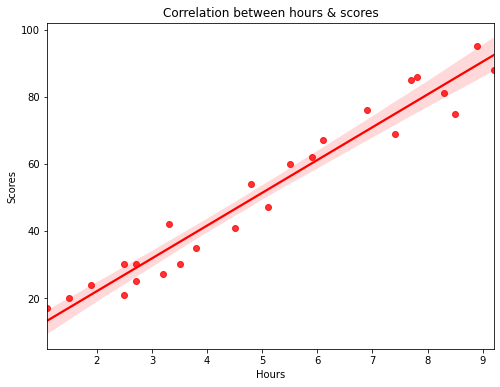

In [32]:
plt.figure(figsize=(8,6))
sns.regplot(x=data['Hours'],y=data['Scores'],color='red')
plt.title("Correlation between hours & scores")

In [4]:
data.corr(method='pearson')

,Hours,Scores
Hours,1.000000,0.976191
Scores,0.976191,1.000000


#### *From the scatterplot, it can bee seen that number of hours and scores has positive correlation which is further confirmed by finding out the correlation between the two. Scores and Hours has a correlation of 0.976191 !*

In [5]:
#investigating for null values
data.isnull().sum()

Hours     0
Scores    0
dtype: int64

In [6]:
#understanding datatypes
data.dtypes

Hours     float64
Scores      int64
dtype: object

### **Training the Model**

In [7]:
#features of the model
features=['Hours']
X=data[features]

#target of the model
y=data.Scores


In [8]:
#splitting the data into train & test
from sklearn.model_selection import train_test_split
train_X,test_X,train_y,test_y=train_test_split(X,y,test_size=0.2,random_state=1)

In [18]:
from sklearn.linear_model import LinearRegression
reg=LinearRegression()
reg.fit(train_X,train_y)

print("Training Completed")

Training Completed


In [21]:
pred_y=reg.predict(test_X)
print(reg.score(test_X,test_y)*100)

84.21031525243528


In [22]:
reg.coef_

array([10.46110829])

In [11]:
df=pd.DataFrame({'Actual':test_y,'Predicted':pred_y})
df

,Actual,Predicted
14,17,9.970262
13,42,32.984700
17,24,18.339148
3,75,87.382463
21,54,48.676362


### **Testing the model**
#### *What will be predicted score if a student studies for 9.25 hrs/ day?*

In [12]:
hour=np.array(9.25)
hour=hour.reshape(-1,1) #reshaping model to 2D format

pred=reg.predict(hour)  #predting the score
print("score = {}".format(pred[0]))

score = 95.22829438402952


### **Model Validation**

In [13]:
from sklearn.metrics import mean_absolute_error
print("MAE = ",mean_absolute_error(test_y,pred_y))

MAE =  7.882398086270432


#### *Therefore, it is predicted that if a student studies for 9.25 hrs/day, then he would score 95.23%*